# Forecasting  Analysis
### Forecast the CocaCola prices and Airlines Passengers data set.Prepare a document for each model explaining 
### how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola.shape

(42, 2)

In [4]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:

cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


C:\Users\91901\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

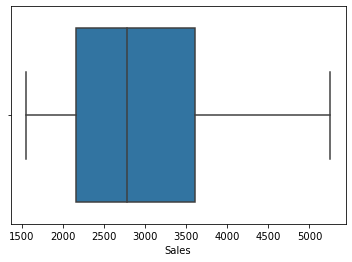

In [6]:
sns.boxplot("Sales",data=cocacola)


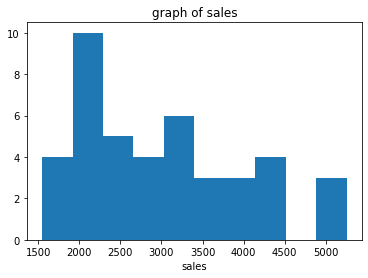

In [7]:
plt.hist("Sales",data=cocacola)
plt.xlabel("sales")
plt.title("graph of sales")
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

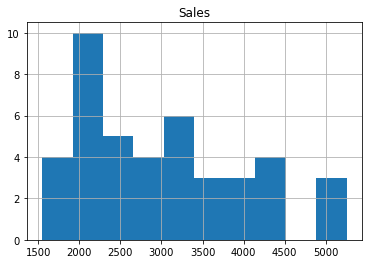

In [8]:
cocacola.hist()

<AxesSubplot:ylabel='Density'>

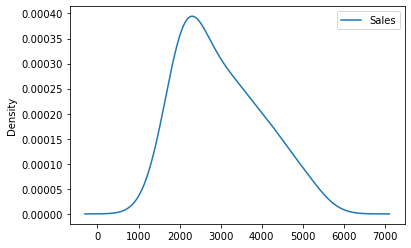

In [9]:
cocacola.plot(kind="kde")

C:\Users\91901\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\91901\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


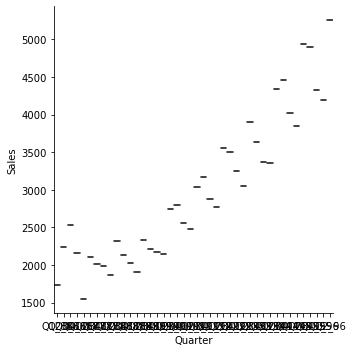

In [10]:

sns.factorplot("Quarter","Sales",data=cocacola,kind="box")

<AxesSubplot:>

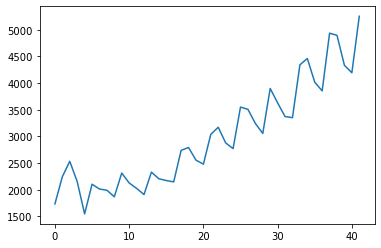

In [11]:
cocacola.Sales.plot(label="org")

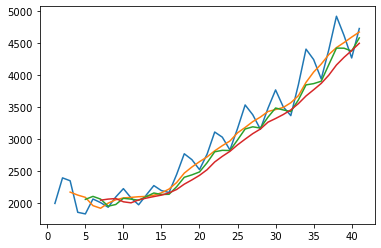

In [12]:
for i in range (2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))


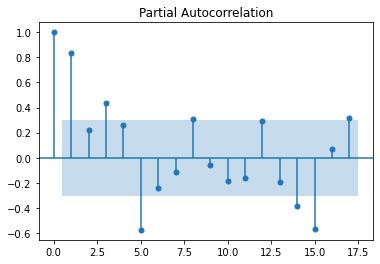

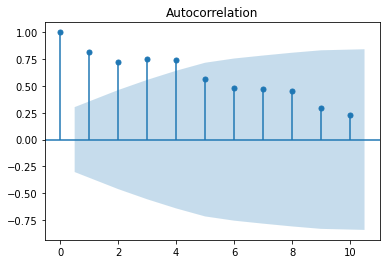

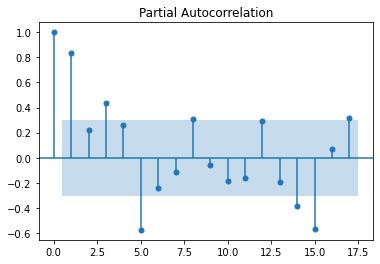

In [13]:
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales)

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.plotting import lag_plot

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

ValueError: could not convert string to float: 'Q1_86'

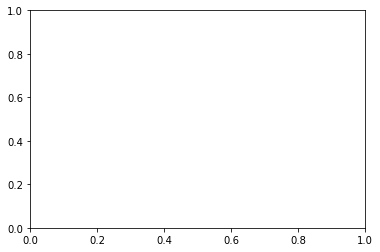

In [24]:
plot_acf(cocacola,lags=40)

C:\Users\91901\AppData\Local\Temp/ipykernel_18240/1626019886.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_add=seasonal_decompose(cocacola.Sales,freq=12)


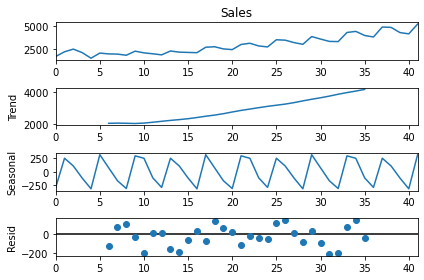

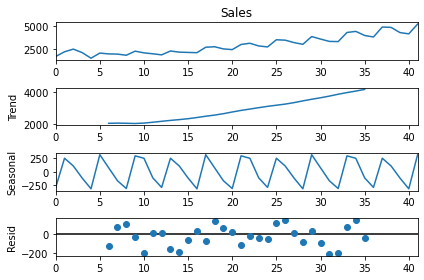

In [29]:
decompose_add=seasonal_decompose(cocacola.Sales,freq=12)
decompose_add.plot()

In [35]:
Train=cocacola.head(48)
Test=cocacola.tail(12)

In [36]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)


In [39]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.681026212917489

In [40]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

11.025182503719508

In [41]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\91901\AppData\Local\Temp/ipykernel_18792/1311508392.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.2450727952558847

In [42]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

2.993028685896603

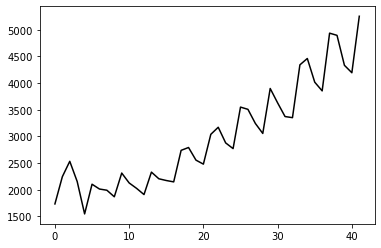

In [43]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")

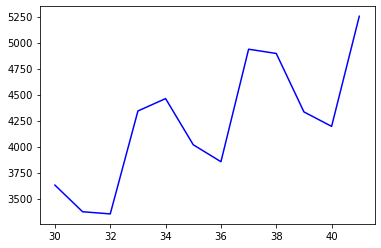

In [44]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")

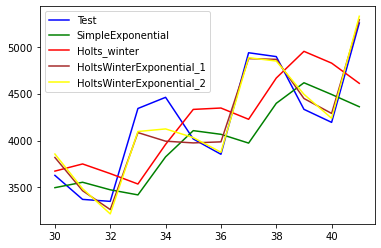

In [50]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')


## Airlines+Data.xlsx

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import itertools
import statsmodels.api as sm
from numpy import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

In [32]:
airlines=pd.read_excel("Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


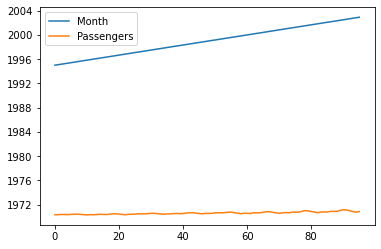

In [33]:
airlines.plot()
plt.show()

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

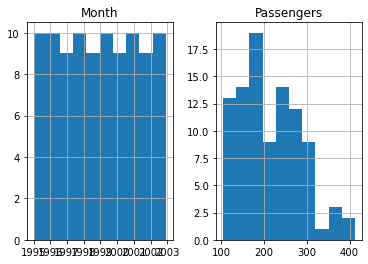

In [34]:
airlines.hist()

<AxesSubplot:ylabel='Density'>

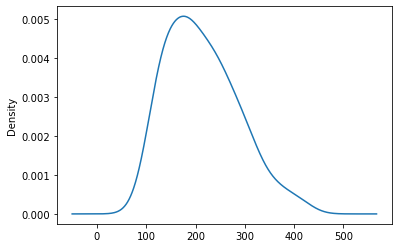

In [35]:
airlines.Passengers.plot(kind="kde")

In [36]:
len(airlines)

96

In [37]:
airlines.shape


(96, 2)

In [38]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


C:\Users\91901\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


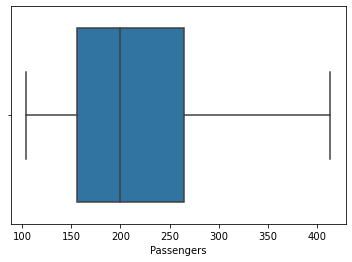

In [39]:
sns.boxplot("Passengers",data=airlines)
plt.show()

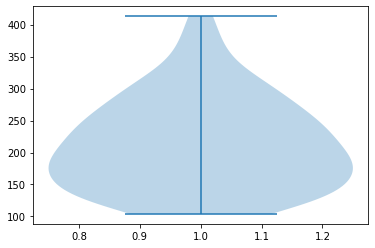

In [40]:
plt.violinplot(airlines.Passengers)
plt.show()

C:\Users\91901\AppData\Local\Temp/ipykernel_18240/534606787.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_add=seasonal_decompose(airlines.Passengers,freq=12)


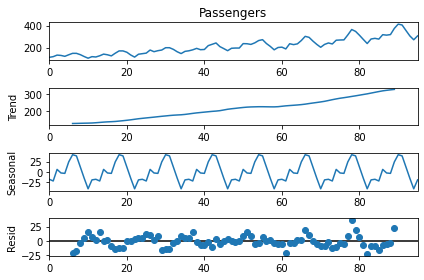

In [52]:
decompose_add=seasonal_decompose(airlines.Passengers,freq=12)
decompose_add.plot()
plt.show()

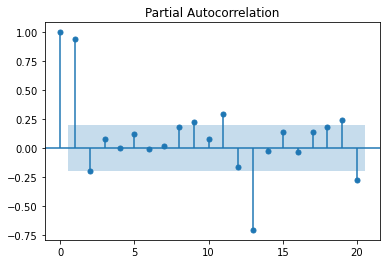

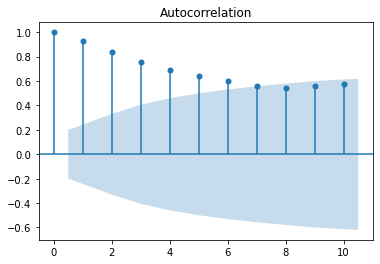

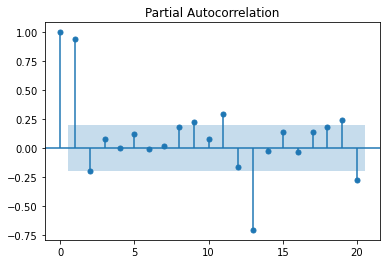

In [53]:
tsa_plots.plot_acf(airlines.Passengers,lags=10)
tsa_plots.plot_pacf(airlines.Passengers)

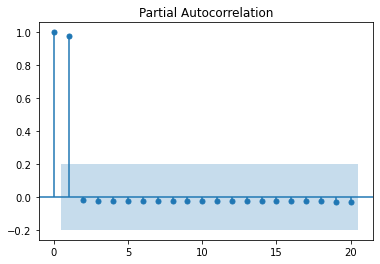

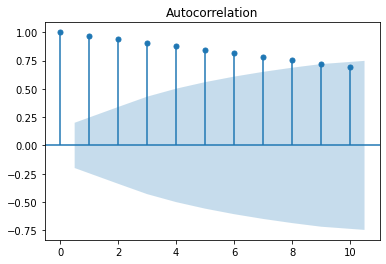

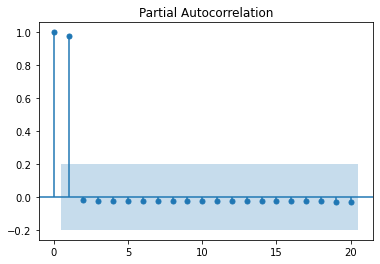

In [56]:
tsa_plots.plot_acf(airlines.Month,lags=10)
tsa_plots.plot_pacf(airlines.Month)

In [43]:
split_point=len(airlines)-10
split_point

86

In [44]:
dataset,validation =airlines[0:split_point],airlines[split_point:]
print("dataset%d,validation%d" % (len(dataset),len(validation)))
dataset.to_csv("dataset.csv",header=False)
validation.to_csv("validation.csv",header=False)

dataset86,validation10


In [45]:
# Persistance base model
from sklearn.metrics import mean_squared_error
train =pd.read_csv("dataset.csv",header=None,index_col=0,parse_dates=True,squeeze=True)
train
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

ValueError: could not convert string to float: '1995-01-01'

In [46]:
train

,1,2
0,,
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278


In [65]:
import os 
os.getcwd()

'C:\\Users\\91901'

In [67]:
print(len(train))
print(len(test))
print(len(validation))

34
35
10


In [72]:
# walk foeward validation
history =[X for X in train ]
prediction= list()
for i in range (len(test)):
    yhat =history[-1]
    prediction.append(yhat)
#observations 
    obs=test[1]
    history.append(obs)
    print(">Predicted = %f ,Expected=% 3f "% (yhat,obs))
#report performance 

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 503.000000 ,Expected= 503.000000 
>Predicted = 

In [74]:
from statsmodels.tsa.arima_model import ARIMA
def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit 
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [75]:
# grid search p q d values 
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [79]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.346
ARIMA(0, 0, 2) RMSE=36.048
ARIMA(0, 0, 3) RMSE=32.587
ARIMA(0, 1, 0) RMSE=22.311
ARIMA(0, 1, 1) RMSE=22.258
ARIMA(0, 1, 2) RMSE=28.430
ARIMA(0, 1, 3) RMSE=30.054
ARIMA(0, 1, 4) RMSE=30.029
ARIMA(0, 2, 0) RMSE=29.335
ARIMA(0, 2, 1) RMSE=23.072
ARIMA(0, 2, 2) RMSE=22.954
ARIMA(0, 2, 3) RMSE=23.375
ARIMA(0, 2, 4) RMSE=29.241
ARIMA(1, 0, 0) RMSE=23.958
ARIMA(1, 0, 1) RMSE=23.998
ARIMA(1, 0, 2) RMSE=25.412
ARIMA(1, 0, 3) RMSE=30.015
ARIMA(1, 1, 0) RMSE=22.270
ARIMA(1, 2, 0) RMSE=27.786
ARIMA(1, 2, 1) RMSE=22.979
ARIMA(2, 0, 0) RMSE=24.131
ARIMA(2, 0, 1) RMSE=24.140
ARIMA(2, 1, 0) RMSE=22.084
ARIMA(2, 2, 0) RMSE=25.616
ARIMA(2, 2, 3) RMSE=25.607
ARIMA(3, 0, 0) RMSE=24.183
ARIMA(3, 0, 1) RMSE=25.100
ARIMA(3, 1, 0) RMSE=25.060
ARIMA(3, 1, 1) RMSE=32.092
ARIMA(3, 2, 0) RMSE=26.126
ARIMA(3, 2, 1) RMSE=25.594
ARIMA(4, 0, 0) RMSE=25.113
ARIMA(4, 0, 1) RMSE=25.172
ARIMA(4, 1, 0) RMSE=26.213
ARIMA(4, 1, 1) RMSE=31.097
ARIMA(4, 1, 2) RMSE=32.326
A

In [80]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [81]:
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

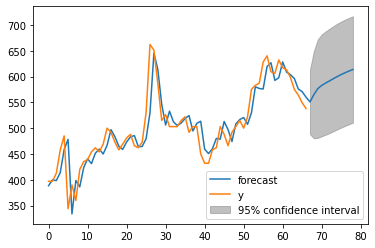

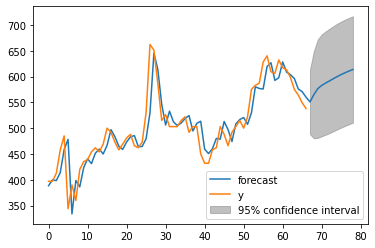

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\91901\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\91901\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\91901\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\91901\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [82]:
model = ARIMA(X, order=(4,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [ ]:
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [ ]:
forecast